In [5]:
!pip install numpy pandas seaborn matplotlib scikit-learn



In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [9]:
df = pd.read_csv('Housetrain.csv')

In [11]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
# Check for missing values
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])




PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


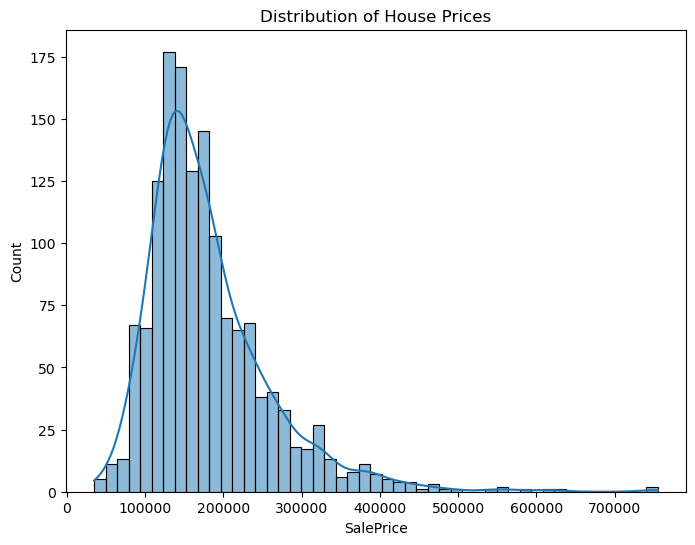

In [17]:
# Plot distribution of target variable (SalePrice)
plt.figure(figsize=(8, 6))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of House Prices")
plt.show()



/var/folders/8j/f6k_4yqs2wx8x17w6dc6_g2m0000gn/T/ipykernel_75183/1789735116.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=False, cmap='coolwarm')


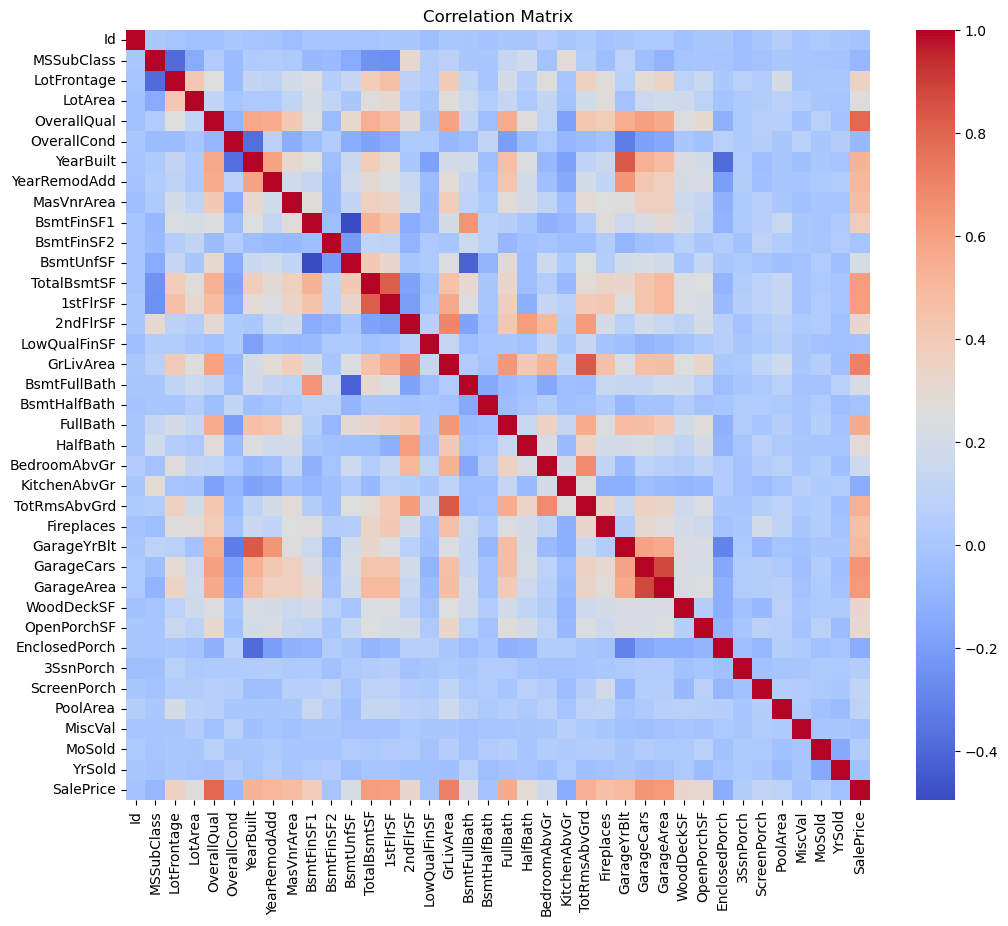

In [19]:
# Plot correlations between features
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [21]:
# Drop columns with too many missing values (e.g., Alley, PoolQC)
df = df.drop(['Alley', 'PoolQC', 'MiscFeature'], axis=1)



In [23]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,MnPrv,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,GdPrv,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,0,4,2010,WD,Normal,142125


In [25]:
# Impute missing values for numerical columns using the median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())



In [27]:
# Impute missing values for numerical columns using the median
df['LotFrontage']

0       65.0
1       80.0
2       68.0
3       60.0
4       84.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1460, dtype: float64

In [29]:

# Impute missing values for categorical columns using the mode
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])



In [31]:
df['GarageType']

0       Attchd
1       Attchd
2       Attchd
3       Detchd
4       Attchd
         ...  
1455    Attchd
1456    Attchd
1457    Attchd
1458    Attchd
1459    Attchd
Name: GarageType, Length: 1460, dtype: object

In [33]:
# Check that missing values have been handled
df.isnull().sum().sum()  # Should return 0 if all missing data is handled

2397

In [35]:
# Apply One-Hot Encoding to categorical columns like 'GarageType' and 'Neighborhood'
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_features = encoder.fit_transform(df[['GarageType', 'Neighborhood']])

# Merge the encoded columns back into the DataFrame
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
df = pd.concat([df, encoded_df], axis=1).drop(['GarageType', 'Neighborhood'], axis=1)

# Check the result
df.head()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# Select numerical features for scaling
numerical_features = ['GrLivArea', 'LotFrontage', 'GarageCars', 'YearBuilt']

# Scale numerical features using StandardScaler
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check scaled values
df[numerical_features].head()


,GrLivArea,LotFrontage,GarageCars,YearBuilt
0,0.370333,-0.220875,0.311725,1.050994
1,-0.482512,0.460320,0.311725,0.156734
2,0.515013,-0.084636,0.311725,0.984752
3,0.383659,-0.447940,1.650307,-1.863632
4,1.299326,0.641972,1.650307,0.951632


In [41]:
# Split data into features (X) and target variable (y)
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set size: {X_train.shape}')
print(f'Test set size: {X_test.shape}')


Training set size: (1168, 104)
Test set size: (292, 104)


In [53]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can use 'median', 'most_frequent', etc.

# Impute the missing values in the training and test sets
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)

# Now use the imputed data to train the model
lr_model.fit(X_train_imputed, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_imputed)

# Evaluate the model using Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 450210444723.8241
R-squared: -57.695084480497734


In [55]:
# Drop rows with missing values in both training and test sets
X_train_dropped = X_train_encoded.dropna()
X_test_dropped = X_test_encoded.dropna()

# Also drop the corresponding rows from y_train and y_test
y_train_dropped = y_train[X_train_encoded.notnull().all(axis=1)]
y_test_dropped = y_test[X_test_encoded.notnull().all(axis=1)]

# Train the model on the data without missing values
lr_model.fit(X_train_dropped, y_train_dropped)

# Make predictions
y_pred = lr_model.predict(X_test_dropped)

# Evaluate the model
mse = mean_squared_error(y_test_dropped, y_pred)
r2 = r2_score(y_test_dropped, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 450210870888.1234
R-squared: -58.911788079819786


In [57]:
from sklearn.ensemble import HistGradientBoostingRegressor

# Create a HistGradientBoosting model
hgbr_model = HistGradientBoostingRegressor()

# Train the model on the original data (with missing values)
hgbr_model.fit(X_train_encoded, y_train)

# Make predictions on the test set
y_pred = hgbr_model.predict(X_test_encoded)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 876708248.8491732
R-squared: 0.8857013085013654


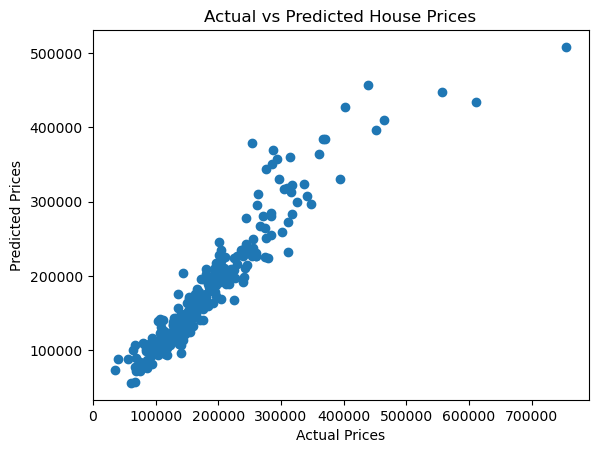

In [59]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted House Prices')
plt.show()


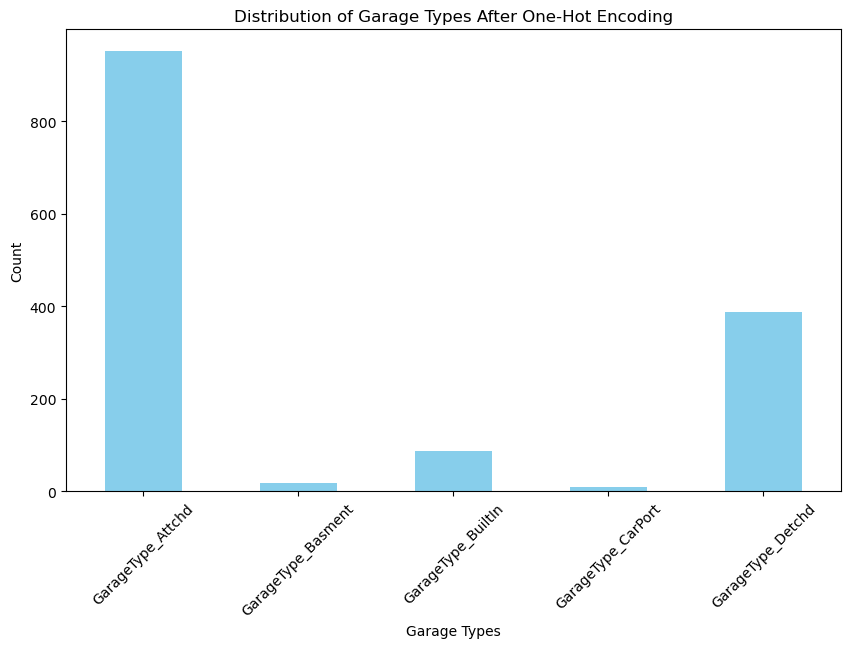

In [61]:
# Plot the distribution of one-hot encoded GarageType
garage_type_columns = [col for col in df.columns if 'GarageType' in col]
garage_type_counts = df[garage_type_columns].sum()

plt.figure(figsize=(10, 6))
garage_type_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Garage Types After One-Hot Encoding')
plt.xlabel('Garage Types')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


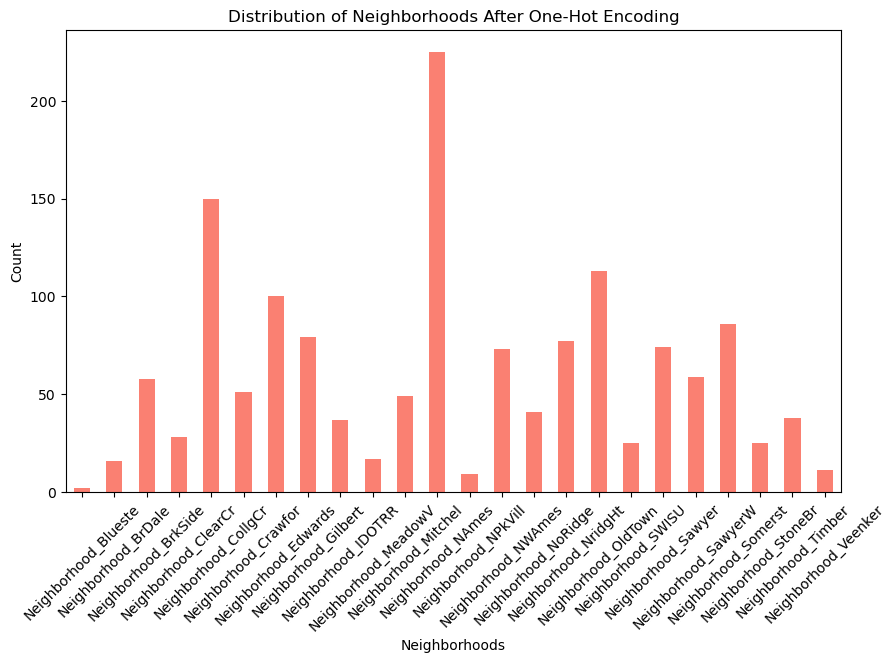

In [63]:
# Plot the distribution of one-hot encoded Neighborhood
neighborhood_columns = [col for col in df.columns if 'Neighborhood' in col]
neighborhood_counts = df[neighborhood_columns].sum()

plt.figure(figsize=(10, 6))
neighborhood_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Neighborhoods After One-Hot Encoding')
plt.xlabel('Neighborhoods')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


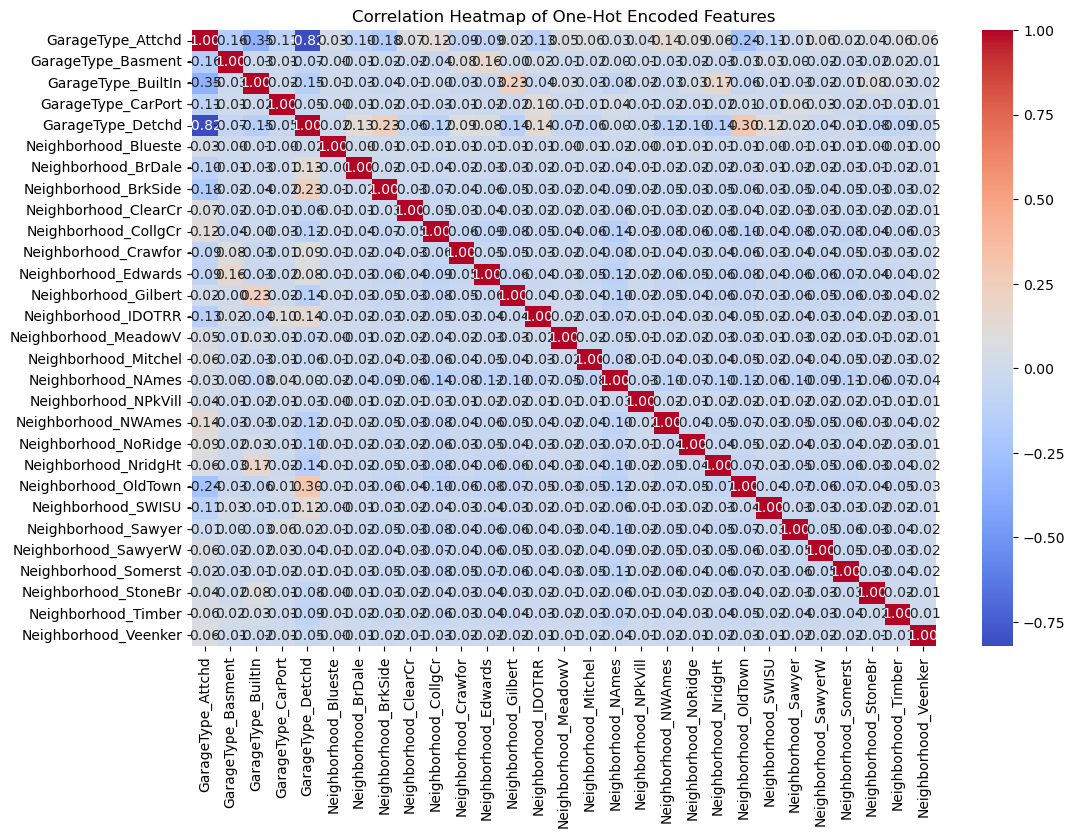

In [65]:
plt.figure(figsize=(12, 8))
sns.heatmap(df[garage_type_columns + neighborhood_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of One-Hot Encoded Features')
plt.show()


In [67]:
# Display the first few rows of the modified DataFrame
print(df.head())


   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL    -0.220875     8450   Pave      Reg         Lvl   
1   2          20       RL     0.460320     9600   Pave      Reg         Lvl   
2   3          60       RL    -0.084636    11250   Pave      IR1         Lvl   
3   4          70       RL    -0.447940     9550   Pave      IR1         Lvl   
4   5          60       RL     0.641972    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... Neighborhood_NoRidge Neighborhood_NridgHt  \
0    AllPub    Inside  ...                  0.0                  0.0   
1    AllPub       FR2  ...                  0.0                  0.0   
2    AllPub    Inside  ...                  0.0                  0.0   
3    AllPub    Corner  ...                  0.0                  0.0   
4    AllPub       FR2  ...                  1.0                  0.0   

  Neighborhood_OldTown Neighborhood_SWISU Neighborhood_Sawyer  \
0                  0.

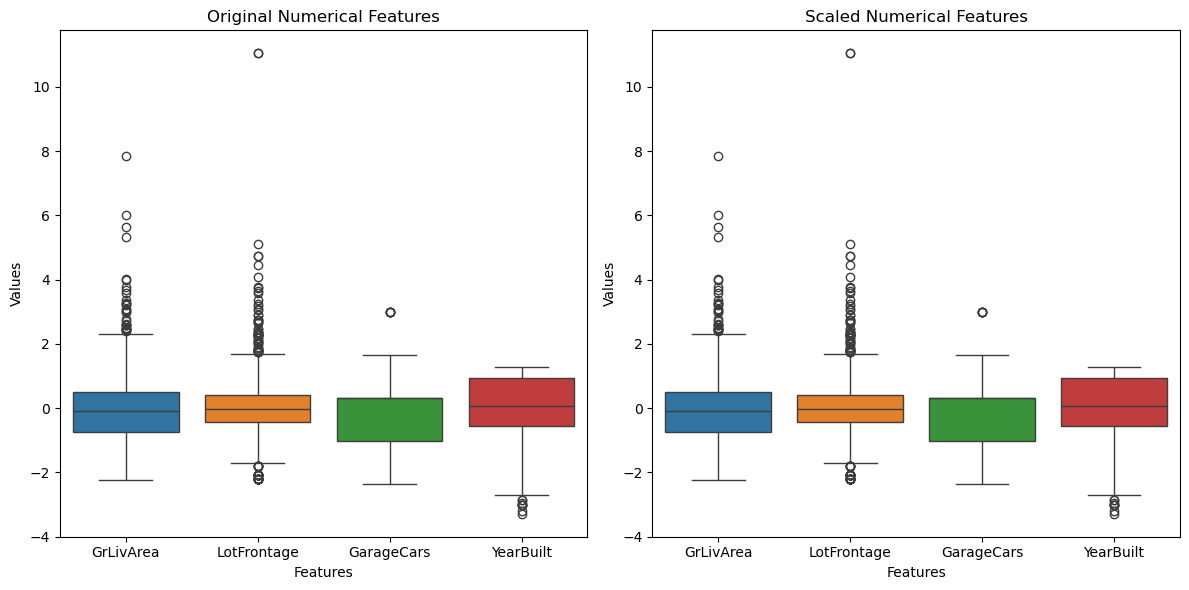

In [69]:
# Create a new DataFrame for the original numerical features
original_numerical_features = df[['GrLivArea', 'LotFrontage', 'GarageCars', 'YearBuilt']].copy()

# Create scaled DataFrame
scaled_numerical_features = df[numerical_features].copy()

# Plot box plots for original and scaled features
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=original_numerical_features)
plt.title('Original Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')

plt.subplot(1, 2, 2)
sns.boxplot(data=scaled_numerical_features)
plt.title('Scaled Numerical Features')
plt.xlabel('Features')
plt.ylabel('Values')

plt.tight_layout()
plt.show()


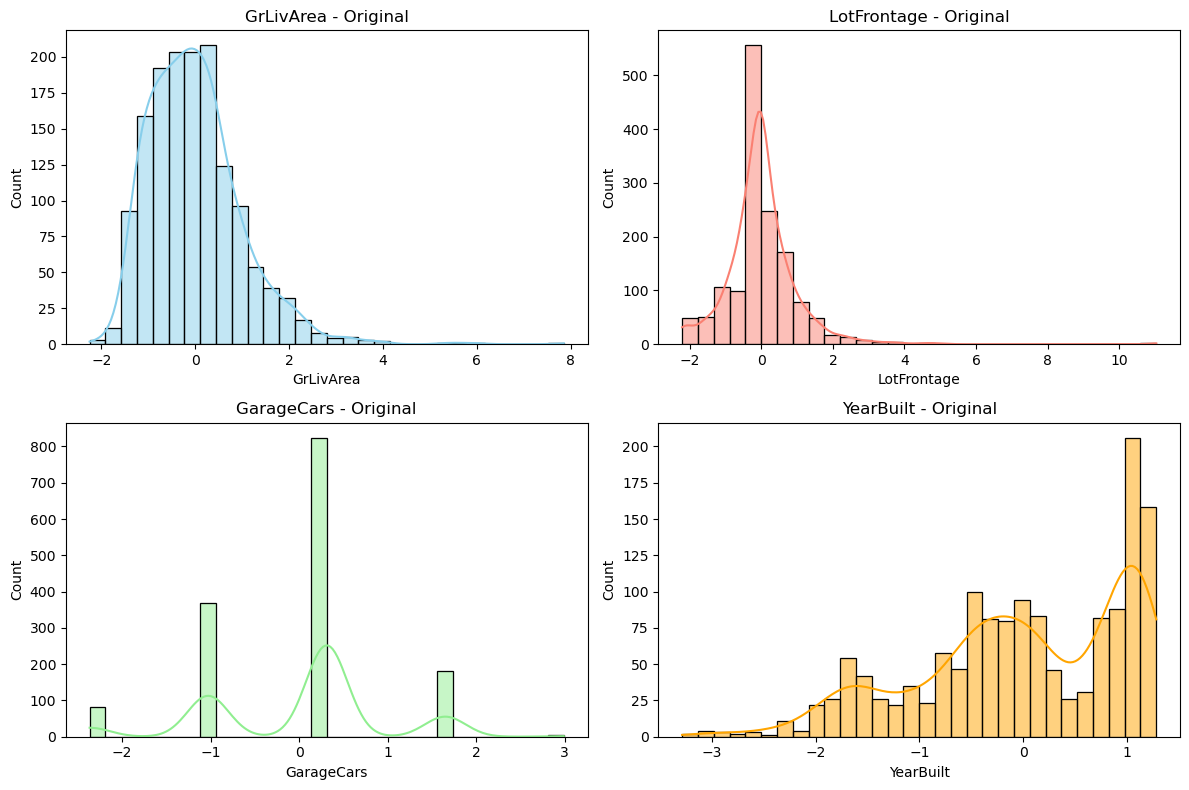

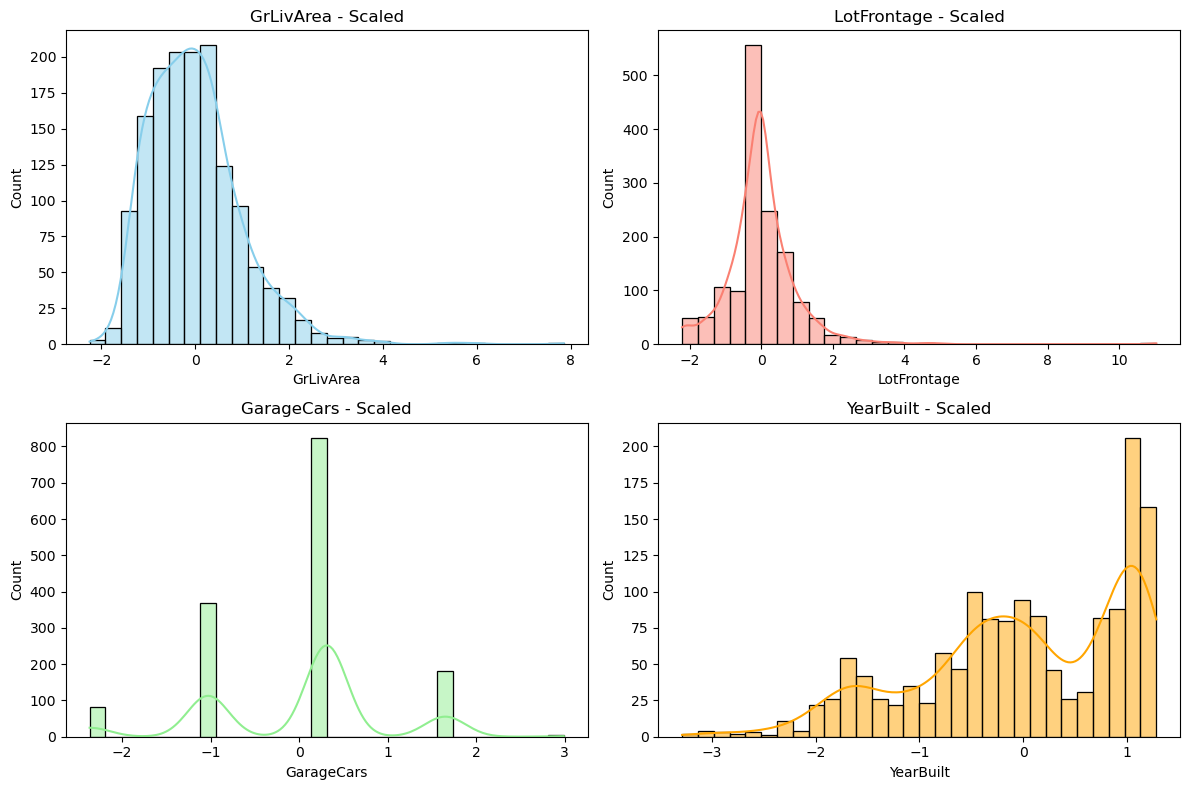

In [71]:
plt.figure(figsize=(12, 8))

# Original features histogram
plt.subplot(2, 2, 1)
sns.histplot(original_numerical_features['GrLivArea'], bins=30, kde=True, color='skyblue')
plt.title('GrLivArea - Original')
plt.xlabel('GrLivArea')

plt.subplot(2, 2, 2)
sns.histplot(original_numerical_features['LotFrontage'], bins=30, kde=True, color='salmon')
plt.title('LotFrontage - Original')
plt.xlabel('LotFrontage')

plt.subplot(2, 2, 3)
sns.histplot(original_numerical_features['GarageCars'], bins=30, kde=True, color='lightgreen')
plt.title('GarageCars - Original')
plt.xlabel('GarageCars')

plt.subplot(2, 2, 4)
sns.histplot(original_numerical_features['YearBuilt'], bins=30, kde=True, color='orange')
plt.title('YearBuilt - Original')
plt.xlabel('YearBuilt')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))

# Scaled features histogram
plt.subplot(2, 2, 1)
sns.histplot(scaled_numerical_features['GrLivArea'], bins=30, kde=True, color='skyblue')
plt.title('GrLivArea - Scaled')
plt.xlabel('GrLivArea')

plt.subplot(2, 2, 2)
sns.histplot(scaled_numerical_features['LotFrontage'], bins=30, kde=True, color='salmon')
plt.title('LotFrontage - Scaled')
plt.xlabel('LotFrontage')

plt.subplot(2, 2, 3)
sns.histplot(scaled_numerical_features['GarageCars'], bins=30, kde=True, color='lightgreen')
plt.title('GarageCars - Scaled')
plt.xlabel('GarageCars')

plt.subplot(2, 2, 4)
sns.histplot(scaled_numerical_features['YearBuilt'], bins=30, kde=True, color='orange')
plt.title('YearBuilt - Scaled')
plt.xlabel('YearBuilt')

plt.tight_layout()
plt.show()


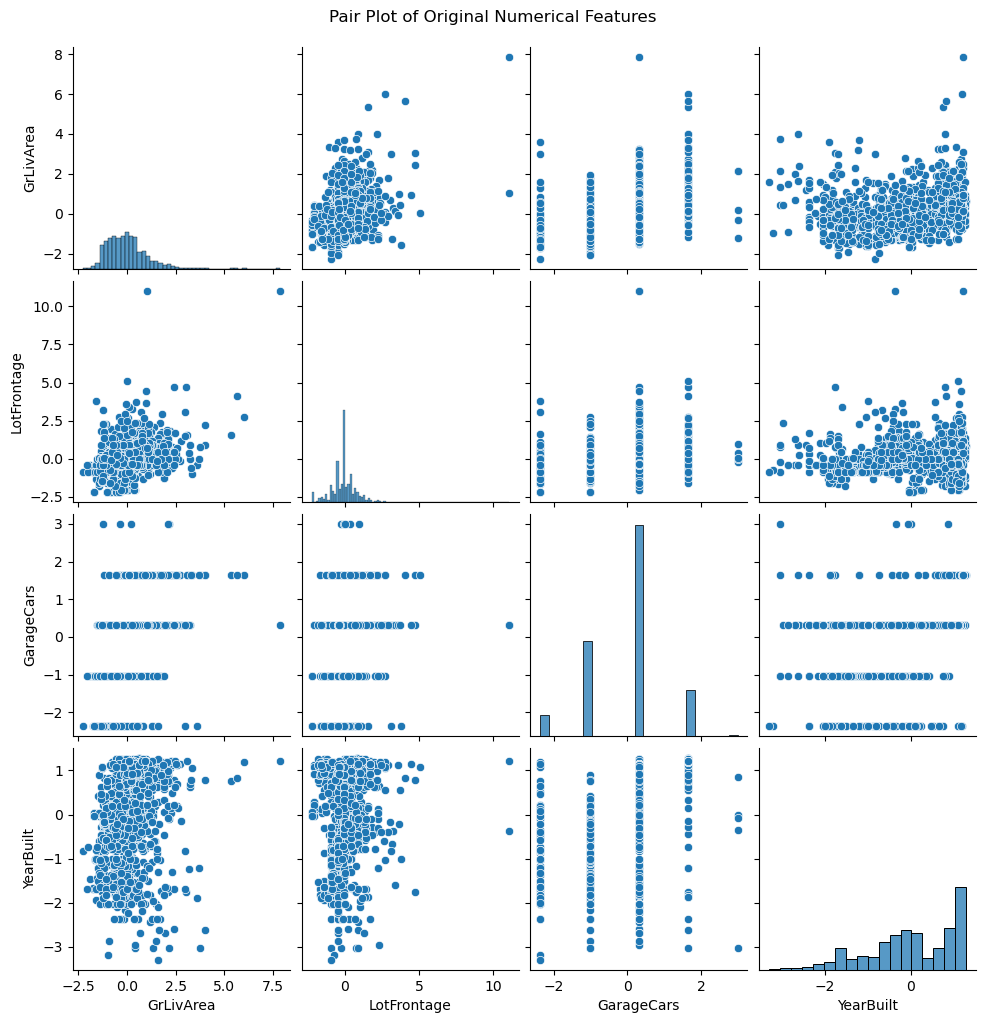

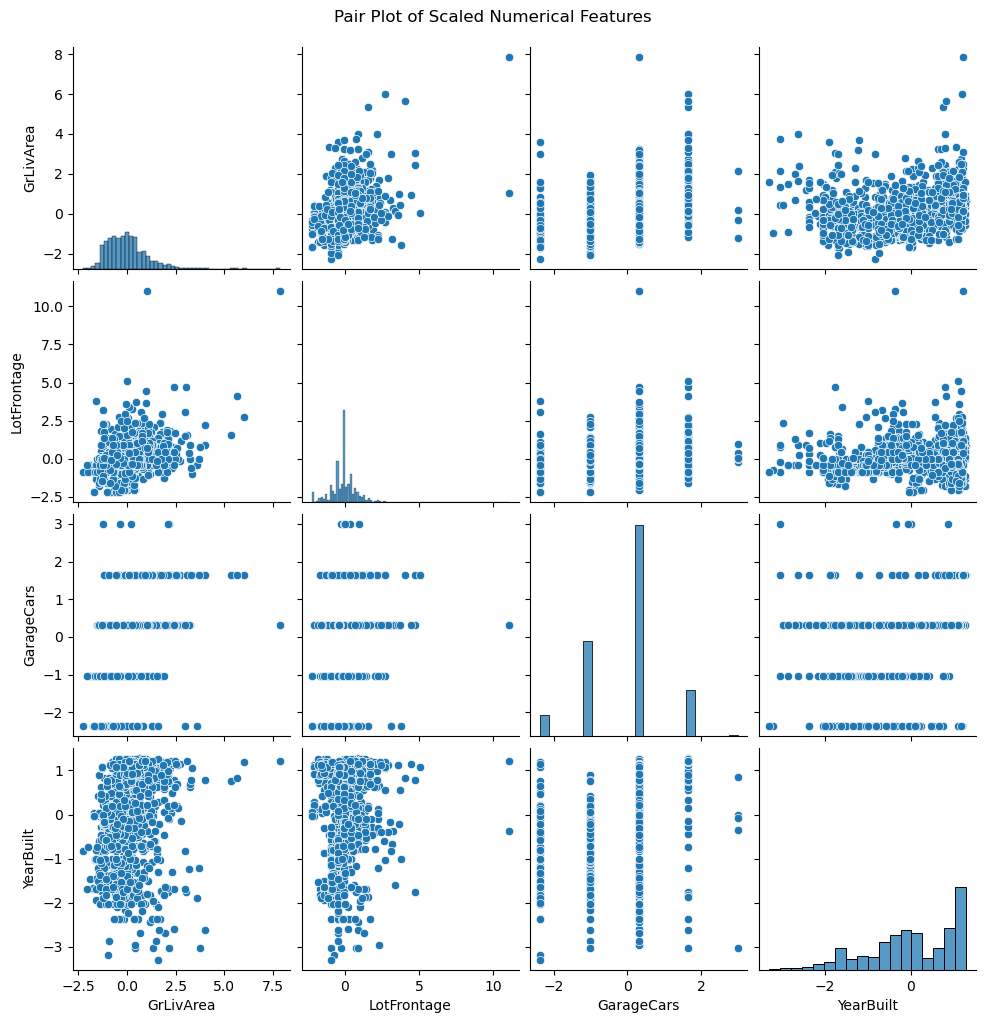

In [73]:
# Pair plot for original numerical features
sns.pairplot(original_numerical_features)
plt.suptitle('Pair Plot of Original Numerical Features', y=1.02)
plt.show()

# Pair plot for scaled numerical features
sns.pairplot(scaled_numerical_features)
plt.suptitle('Pair Plot of Scaled Numerical Features', y=1.02)
plt.show()
